Michael Muschitiello // Sector Correlation Analysis

- This notebook downloads daily historical prices for the SPDR Sector ETFs from Yahoo Finance,
starting in 2010. It computes returns, correlation, and covariance among these sector ETFs.
Finally, it generates heatmaps to visualize how the sectors move together over time.

## Key Steps
1. **Data Acquisition**  
   - Uses yfinance to download daily closing prices for each sector ETF.

2. **Data Cleaning**  
   - Removes rows with missing values to ensure consistent time series.

3. **Return Computation**  
   - Computes log returns to standardize percentage changes.

4. **Correlation & Covariance**  
   - Creates correlation and covariance matrices to show relationships among ETFs.

5. **Visualization**  
   - Plots heatmaps of both correlation and covariance for a clear, at-a-glance view.


In [1]:
import numpy as np 
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
etf_tickers = {
    'XLC': 'Communication Services',
    'XLY': 'Consumer Discretionary',
    'XLP': 'Consumer Staples',
    'XLE': 'Energy',
    'XLF': 'Financials',
    'XLV': 'Health Care',
    'XLI': 'Industrials',
    'XLB': 'Materials',
    'XLRE': 'Real Estate',
    'XLK': 'Technology',
    'XLU': 'Utilities'
}

etf_data = yf.download(list(etf_tickers.keys()), start='2010-01-01', interval='1d', group_by='ticker')
etf_close_prices = {etf_tickers[ticker]: etf_data[ticker]['Close'] for ticker in etf_tickers}


etf_close_df = pd.DataFrame(etf_close_prices)



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  11 of 11 completed


In [3]:
etf_close_df.dropna(axis=0, inplace=True)
nan_counts = etf_close_df.isna().sum().sum()
nan_counts, etf_close_df.shape

(0, (1684, 11))

In [4]:
log_rets = np.log(etf_close_df / etf_close_df.shift(1)).dropna()
log_corr = etf_close_df.corr()
log_cov = etf_close_df.cov()

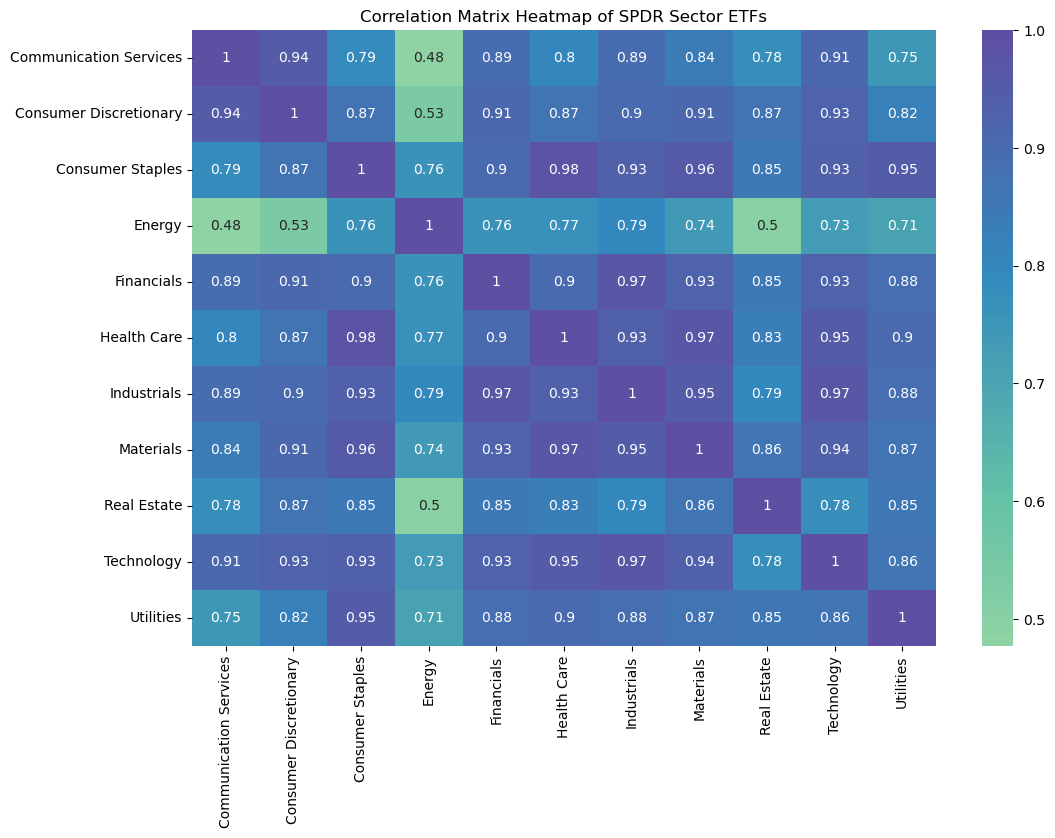

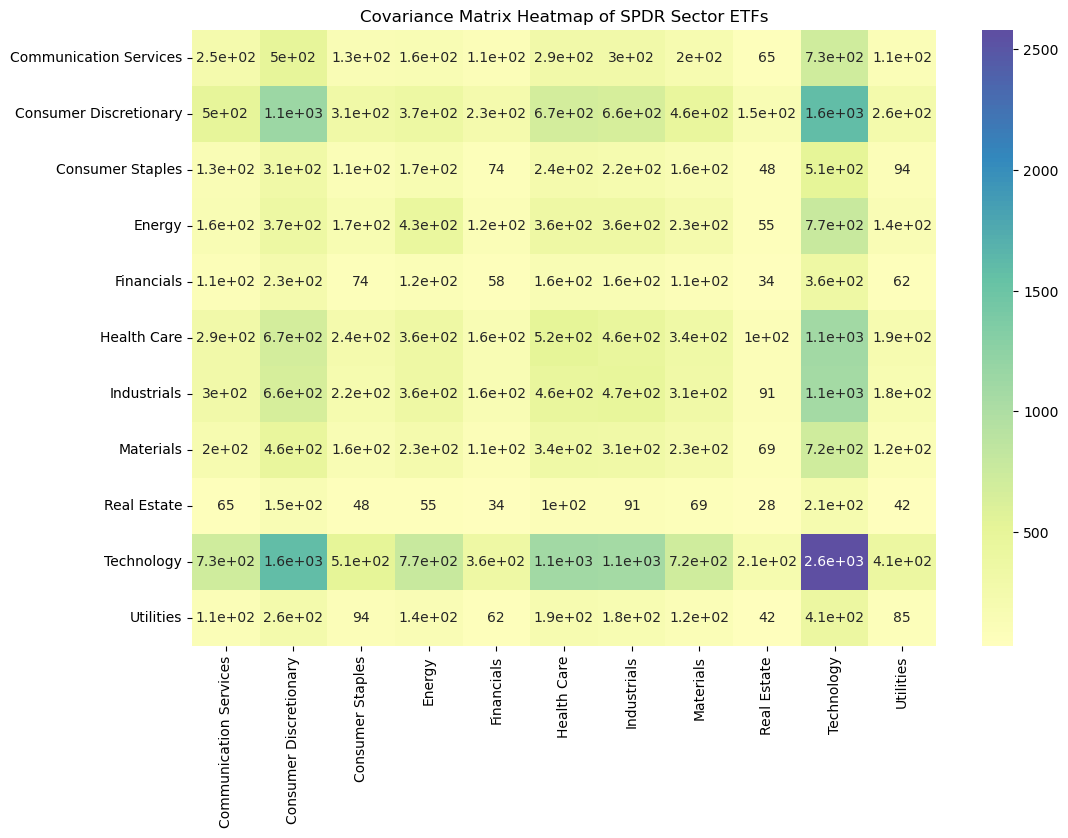

In [5]:
# correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(log_corr, annot=True, cmap='Spectral', center=0)
plt.title("Correlation Matrix Heatmap of SPDR Sector ETFs")
plt.show()

# covariance heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(log_cov, annot=True, cmap='Spectral', center=0)
plt.title("Covariance Matrix Heatmap of SPDR Sector ETFs")
plt.show()